# Replication: Rahayel *et al*, 2018
## Introduction

This notebook attempts to replicate the following paper with the [PPMI](http://ppmi-info.org) dataset:

<div class="alert alert-block alert-success">
Shady Rahayel, et al. <a href=https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5957304/>Cortical and subcortical gray matter bases of cognitive deficits in REM sleep behavior disorder</a> Neurology, vol. 90, no. 20, pp. e1759–e1770, 2018.
</div>

This study involved 52 patients with polysomnography confirmed RBD, including 17 with MCI and 35 without MCI. They were compared to 41 controls.

The demographics and clinical characteristics were as follows (table extracted from the paper):

<img src="images/table1.png"/>

The main results of the paper are:

1. **Montreal Cognitive Assessment**
    - RBD patients with MCI scored lower vs RBD patients without MCI and controls. (Table 1)
    
    
2. **FM100 performance and composite cognitive scores**
    - RBD patients with MCI scored lower vs RBD patients without MCI and controls. (Table 1)
    
    
3. **Systolic blood pressure drop**
    - RBD patients with MCI had greater systolic blood pressure drop compared to RBD patients without MCI. (Table 1)
    
    
4. **Domain subtype among RBD patients with MCI**
    - single-domain subtype
        - 65% (11/17)
    - multi-domain subtype
        - 35% (6/17)
        
        
5. **Cortical thickness difference between groups**
    - MCI showed an increased rate of overall cortical thinning compared with both Non-MCI and HC (Table 2).
        - **RBD patients with MCI vs RBD patients without MCI** 
            - RBD patients with MCI exhibited a more extensive pattern of cortical thinning compared to RBD patients without MCI
            - the left and right temporal lobe, the insula, the occipital cortex, the left medial superior frontal and anterior and posterior cingulate cortices, and the right temporal, superior frontal, posterior (table 2, figure 1A).
        - **RBD patients with MCI vs controls**
            - MCI - regions affected included the anterior temporal lobe, insula, middle and inferior frontal cortices, superior medial frontal and cingulate cortices, posterior temporal lobe and fusiform cortex, among others. (table 2, figure 1B)
            - Significant reduction was found in the precentral and postcentral cortices in RBD patients with MCI compared to controls. 
        - **RBD patients without MCI vs controls**
            - without MCI presented cortical thinning in the left superior medial frontal and paracentral cortices and in the right precentral and paracentral cortices (table 2, figure 1C)
            
6. **Cortical volume difference between groups**

    - Looking at where RBD patients with MCI showed decreased cortical volume vs controls, significant reduction was found in the precentral and postcentral cortices (table 2, figure 1D).

 <img src="images/table2.png"/>
 
 <img src="images/figure1.png"/>            

7. **Subcortical surface difference between groups**
    - Compared to RBD patients without MCI, RBD patients with MCI showed abnormal surface contraction (Table 3)
        - RBD patients with MCI vs RBD patients without MCI
            - MCI showed abnormal surface contraction in the left putamen and thalamus  (table 3, figure 1E)
            - No surface expansion was found in RBD patients with MCI.
        - RBD patients with MCI vs controls
            - MCI had abnormal surface contraction in the bilateral putamen and thalamus and in the left pallidum (table 3, figure 1F)
            - No surface expansion was found in RBD patients with MCI.
        - RBD patients without MCI vs controls
            - There were no significant between-group differences in subcortical surfaces.
 
 <img src="images/table3.png"/>
 
 
<!--  
<img src="images/table4.png"/> 
<img src="images/table5.png"/>
<img src="images/table5-continued.png"/>
<img src="images/figure2.png"/> 
-->

## Initial setup

<!-- LivingPark notebooks use a *cache* directory to store analysis inputs and outputs. Inputs typically include PPMI Study Data and imaging data whereas outputs include processed images and other derivatives. Cache directories allow LivingPark notebooks to run in a few minutes as they reuse previously computed results. However, cache directories cannot be made public due to the PPMI Data Usage Agreement (DUA). Instead, they are stored on `login.bic.mni.mcgill.ca`, which requires a specific user name and password. In case you don't have access to the cache directory of this notebook, the next sections will download all the required imaging data from PPMI and recompute the results, which will take a few hours depending on your computer configuration. In the future, we will aim at storing this cache dataset on PPMI servers so that they can be accessed with a PPMI account. -->

Let's initialize the notebook directory and software dependencies:

In [1]:
import livingpark_utils

utils = livingpark_utils.LivingParkUtils()
random_seed = 2
utils.notebook_init()

This notebook was run on 2023-06-17 20:04:26 UTC +0000


## PPMI cohort preparation

We will build a PPMI cohort that matches the one used in the original study as much as possible. As in other LivingPark replications, we will use the same sample size as the original study. Our cohort will be built directly from PPMI Study Data files so that it can be replicated and updated whenever necessary.

### Study data download

We will start by downloading the PPMI Study Data files required to build our cohort: 
* Demographics (to retrieve sex)
* REM Sleep Behavior Disorder Questionnaire (for RBD score)
* Prodromal History (for polysomnographies)
* Primary Clinical Diagnosis (to include only healthy subjects)
* Cognitive Categorization (to exclude subjects with dementia)
* Medical Condition (to exclude neurological and psychiatric disorders)
* Concomitant Medication Log (to exclude medication known to modify REM sleep architecture and muscle tone)
* Montreal Cognitive Assessment MoCa (MoCA and MMSE scores)

We will use the LivingPark utils library to download these files from the notebook. If files are already present in the notebook cache, they won't be downloaded again. Otherwise, you will need to enter your PPMI username and password. In case you don't have a PPMI account, you can request one [here](http://ppmi-info.org).

In [2]:
required_files = [
    "Demographics.csv",
    "REM_Sleep_Behavior_Disorder_Questionnaire.csv",
    "Primary_Clinical_Diagnosis.csv",
    "Cognitive_Categorization.csv",
    "Medical_Conditions_Log.csv",
    "Concomitant_Medication_Log.csv",
    "Prodromal_History.csv",
    "Montreal_Cognitive_Assessment__MoCA_.csv",
    "Socio-Economics.csv",
    "Vital_Signs.csv"
]

utils.download_ppmi_metadata(required_files, headless=False)

/tmp/ipykernel_3349853/2843202684.py:14: DeprecationWarning: Call to deprecated function download_ppmi_metadata.
This function will be remove in future version.
Moved to function `livinpark_utils::LivingParkUtils::get_study_files`.
  utils.download_ppmi_metadata(required_files, headless=False)


Download skipped: No missing files!


We will also need file `MRI_info.csv` produced by another LivingPark notebook available at https://github.com/LivingPark-MRI/livingpark-utils/blob/main/livingpark_utils/notebooks/mri_metadata.ipynb. This file contains a list of T1-weighted MRIs usable for VBM. 

In [3]:
# # %%capture
# from livingpark_utils.scripts import (
#     mri_metadata,
#     pd_status,
# )

### RBD Score computation

The original study used polysomnography to diagnose REM Sleep Behavior Disorder. 

While polysomnography is available in the PPMI prodromal cohort, as of July 2022 the number of subjects matching the inclusion/exclusion criteria in this cohort is not enough to replicate the original study (see also Section "Inclusion criteria").

Instead, we will use the REM Sleep Behavior Disorder Screening Questionnaire (RSBDSQ) [[1]](https://movementdisorders.onlinelibrary.wiley.com/doi/10.1002/mds.21740) to discriminate RBD patients from controls. This questionnaire consists of 13 yes/no questions that are summed to produce an RBD score. We computed the RBD score by summing the answers to each of the 13 questions. The answers to questions Q1 to Q9 (12 questions as Q6 is sub-divided in 4 parts) are directly availble in the RSBDSQ Study Data file. We computed the answer to Q10 ("I have/had a disease of the nervous system (e.g., stroke, head trauma, parkinsonism, RLS, narcolepsy, depression, epilepsy, inflammatory disease of the brain), which?") by taking the max of the 8 corresponding disease variables in the RSBDSQ Study Data file. We also computed the answer to Q6 as the sum of Q6.1 to Q6.4 as it will use as inclusion criterion for controls.

Update: There are enough polysomnography subjects now.

We obtain the following distribution of RBD scores in the PPMI dataset:

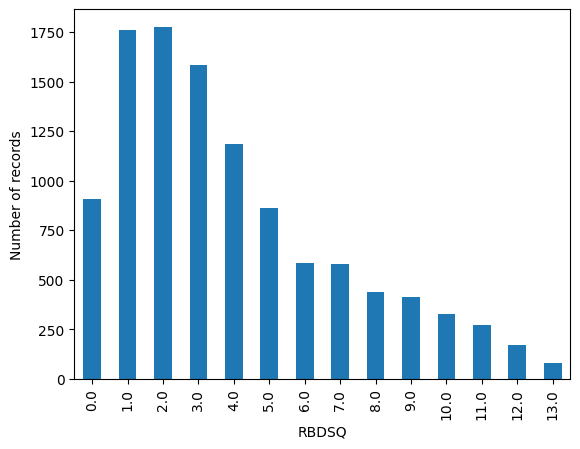

In [3]:
import os
import pandas as pd

# Load PPMI RSBDQ data
rbdsq = pd.read_csv(
    os.path.join(utils.study_files_dir, "REM_Sleep_Behavior_Disorder_Questionnaire.csv")
)

# Compute RBDSQ score
rbdsq["RBDSQ"] = (
    rbdsq["DRMVIVID"]  # Q1
    + rbdsq["DRMAGRAC"]  # Q2
    + rbdsq["DRMNOCTB"]  # Q3
    + rbdsq["SLPLMBMV"]  # Q4
    + rbdsq["SLPINJUR"]  # Q5
    + rbdsq["DRMVERBL"]  # Q6.1
    + rbdsq["DRMFIGHT"]  # Q6.2
    + rbdsq["DRMUMV"]  # Q6.3
    + rbdsq["DRMOBJFL"]  # Q6.4
    + rbdsq["MVAWAKEN"]  # Q7
    + rbdsq["DRMREMEM"]  # Q8
    + rbdsq["SLPDSTRB"]  # Q9
    + rbdsq[  # Q10
        [
            "BRNINFM",
            "DEPRS",
            "EPILEPSY",
            "HETRA",
            "NARCLPSY",
            "PARKISM",
            "RLS",
            "STROKE",
        ]
    ].max(axis=1)
)

rbdsq["Q6"] = (
    rbdsq["DRMVERBL"] + rbdsq["DRMFIGHT"] + rbdsq["DRMUMV"] + rbdsq["DRMOBJFL"]
)

# Note: CNSOTHCM isn't present in data

# Check that max RBDSQ score is <= 13
assert rbdsq["RBDSQ"].max() <= 13

rbdsq = rbdsq[["PATNO", "EVENT_ID", "Q6", "RBDSQ", "STROKE", "EPILEPSY"]]

rbdsq.groupby("RBDSQ").count()["PATNO"].plot.bar()

from matplotlib import pyplot as plt

plt.ylabel("Number of records")
plt.show()

### Inclusion criteria

To replicate the cohort in the original study, we used the following inclusion and exclusion criteria among PPMI subjects.

- Inclusion
    - RBD Group
        1. If not enough subjects with polysomnography, RBD Score >= 5
        2. Patients with polysomnography confirmed RBD according to the International Classification of Sleep Disorders
        3. T1-weighted MRI available and usable for VBM (see [MRI metadata notebook](https://github.com/LivingPark-MRI/livingpark-utils/blob/main/livingpark_utils/notebooks/mri_metadata.ipynb)).
    - Control group
        1. RBD Score < 5
        2. Score to Q6 of the RSBDSQ is 0.
- Exclusion
    - Participants with a history of:
        - parkinsonism -> PRIMDIAG = 17 (no PD nor other neurological disorder) or PRIMDIAG = 25 (prodromal) 
        - dementia -> COGSTATE = 3
        - stroke -> REMSLEEP
        - head trauma
        - brain injury
        - unstable hypertension or diabetes -> Concomittent log - CMINDC - 14 (hypertension) - 11 (diabetes)
        - chronic obstructive pulmonary disease -> MHCAT 105 - 1G
        - claustrophobia
        - EEG abnormalities suggesting epilepsy -> REMSLEEP
        - encephalitis
        - or any other neurologic disorders -> MHCAT 114 - 1P + PRIMDIAG 17 or 97
        - or with artifacts on brain scans


In case multiple visits of a given subject are included in the RBD or Control group, we randomly select one of them for inclusion in the group and exclude the other ones. This selection ensures that a given subject is included at most once in the RBD group and at most once in the control group. In Section "Cohort matching", we will ensure that a given subjet is included in at most one group. 

We obtain the following group sizes:

<!-- and a cutoff score of 6 to identify RBD subjects among PD subjects, consistently with the results presented in [[2]](https://www.sciencedirect.com#/science/article/pii/S138994571100164X). -->

In [4]:
# Read data files

# TODO: FM-100, Domain Sub type, handedness (HANDED	SCREEN), Tonic activity (REM Sleep)

# Tonic - means that muscle contains mostly slow-contraction, long-duralibity fibers. These mucles have tendency to over-tension and to shorten (for example in spasticity). 
# Phasic - means that muscle contains mostly quick-contraction, hi-power, short-duralibity fibers.

# Blood pressure
# was measured manually in supine position and after standing
# for 1 minute, and systolic blood pressure drop was calculated
# by subtracting supine from the standing measure

# Prodromal history
prodr_hist = pd.read_csv(os.path.join(utils.study_files_dir, 'Prodromal_History.csv'))[["PATNO", "RBDDIAG", "RBDPSG"]]

# MRI info
mri = pd.read_csv(os.path.join(utils.study_files_dir, "MRI_info.csv"))[
    ["Subject ID", "Visit code", "Description", "Age"]
]
mri.rename(columns={"Subject ID": "PATNO", "Visit code": "EVENT_ID"}, inplace=True)

# Demographics
dem = pd.read_csv(os.path.join(utils.study_files_dir, "Demographics.csv"))[["PATNO", "SEX"]]

# Education
edu = pd.read_csv(os.path.join(utils.study_files_dir, "Socio-Economics.csv"))[["PATNO", "EDUCYRS"]]

# Diagnosis
diag = pd.read_csv(os.path.join(utils.study_files_dir, "Primary_Clinical_Diagnosis.csv"))[
    ["PATNO", "EVENT_ID", "PRIMDIAG", "OTHNEURO"]
]

# Vital Signs
vital = pd.read_csv(os.path.join(utils.study_files_dir, "Vital_Signs.csv"))[["PATNO", "SYSSTND", "SYSSUP"]]
vital["SYSDROP"] = vital["SYSSUP"] - vital["SYSSTND"]

# Cognitive Categorization
cog_cat = pd.read_csv(os.path.join(utils.study_files_dir, "Cognitive_Categorization.csv"))[
    ["PATNO", "EVENT_ID", "COGSTATE"]
]

# Medical condition
med_cond = pd.read_csv(os.path.join(utils.study_files_dir, "Medical_Conditions_Log.csv"))[
    ["PATNO", "EVENT_ID", "MHCAT"]
].groupby(['PATNO', 'EVENT_ID'])[['MHCAT']].aggregate(lambda x: tuple(set(x))) # aggregate all codes in a tuple

# Medication
meds = pd.read_csv(os.path.join(utils.study_files_dir, "Concomitant_Medication_Log.csv"))[
    ["PATNO", "EVENT_ID", "CMTRT", "CMINDC"]
].groupby(['PATNO', 'EVENT_ID'])[['CMTRT', 'CMINDC']].aggregate(lambda x: tuple(x)) # aggregate all meds in a tuple

# MoCA TODO: Screening vs baseline?
moca = pd.read_csv(
    os.path.join(utils.study_files_dir, "Montreal_Cognitive_Assessment__MoCA_.csv")
)[["PATNO", "EVENT_ID", "MCATOT", "INFODT"]]
# MoCA - Use screening instead of baseline.
moca = moca[moca["EVENT_ID"] != "BL"]
moca["EVENT_ID"].mask(moca["EVENT_ID"] == "SC", "BL", inplace=True)

# Clean UPDRS file. Impute missing ON/OFF values.
# It produces MDS_UPDRS_Part_III_clean.csv file
# from livingpark_utils.scripts import pd_status

updrs = pd.read_csv(
    os.path.join(utils.study_files_dir, "MDS_UPDRS_Part_III_clean.csv")
)[["PATNO", "EVENT_ID", "NP3TOT"]]

def included(subjects, with_mci=False):
    '''
    Return subjects complying to the inclusion criteria mentioned before.
    
    Parameters
    ----------
    subjects: DataFrame. Has to contain columns PATNO and EVENT_ID and PRIMDIAG
    '''
    temp =  (
        subjects.merge(dem, on="PATNO", how="inner") # Sex is available
             .merge(diag[diag['PRIMDIAG'].isin([17, 25])], on=["PATNO", "EVENT_ID"], how="inner") # Subject is healthy or prodromal
             .merge(mri, on=["PATNO", "EVENT_ID"], how="inner")  # MRI usable for VBM is available
             .merge(cog_cat[cog_cat["COGSTATE"] == 2 if with_mci else cog_cat["COGSTATE"] == 1], how="inner", on=["PATNO", "EVENT_ID"])  # No dementia - with MCI or without MCI
             .merge(med_cond, on=["PATNO", "EVENT_ID"], how="left")
             .merge(meds, on=["PATNO", "EVENT_ID"], how="left")
            .merge(edu, on=["PATNO"], how="left")
            .merge(moca, on=["PATNO", "EVENT_ID"], how="left")
            .merge(vital, on=["PATNO"], how="left")
            .merge(updrs, on=["PATNO", "EVENT_ID"], how="left")
                 [
                    [
                        "PATNO",
                        "EVENT_ID",
                        "RBDSQ",
                        "Q6",
                        "SEX",
                        "Age",
                        "Description",
                        "PRIMDIAG",
                        "COGSTATE",
                        "MHCAT",
                        "CMTRT",
                        "CMINDC",
                        "EDUCYRS",
                        "MCATOT",
                        "SYSDROP",
                        "NP3TOT"
                    ]
                ]
            )
    
    # Check medical condition and return
    def check_mhcat(x):
        import numpy as np
        if type(x) == tuple:
            # no neurologic disorders or chronic obstructive pulmonary disease
            return not ("1P" in x or "1G" in x)
        else:
            return np.isnan(x)
        
    # Check concomitant medication log indication and return
    def check_indication(x):
        import numpy as np
        if type(x) == tuple:
            # no hypertension or diabetes
            return not (14 in x or 11 in x)
        else:
            return np.isnan(x)
        
    return temp[
                (temp["MHCAT"].apply(check_mhcat)) 
                & (temp["CMINDC"].apply(check_indication)) 
#                 & (temp["MCATOT"].notnull())
               ]  # No neurological or psychiatric illness and no evidence of central nervous system (CNS) comorbidities

# Extract RBD subjects and controls according to inclusion criteria
# Sample one entry (event and T1 description) per subject in each group so that a subject happens at most once in a group (between-group consistency will be ensured in cohort matching)
# Sort entries by PATNO to improve reproducibility of this notebook
    
# RBD with Polynosomgraphy
rbds_poly_mci =  included((prodr_hist[(prodr_hist['RBDDIAG']==1) & (prodr_hist['RBDPSG']==1)].merge(rbdsq, on="PATNO", how="inner")), True)
if len(rbds_poly_mci) !=0 : 
    rbds_poly_mci = (rbds_poly_mci.groupby("PATNO")
    .sample(1, random_state=random_seed)
    .sort_values(by="PATNO"))
    
rbds_poly_wo_mci =  included((prodr_hist[(prodr_hist['RBDDIAG']==1) & (prodr_hist['RBDPSG']==1)].merge(rbdsq, on="PATNO", how="inner")))
if len(rbds_poly_wo_mci) !=0 : 
    rbds_poly_wo_mci = (rbds_poly_wo_mci.groupby("PATNO")
    .sample(1, random_state=random_seed)
    .sort_values(by="PATNO"))
    
# RBD with SQ
rbds_sq_mci = (included(rbdsq[(rbdsq["RBDSQ"] >= 5) & (rbdsq["STROKE"] == 0) & (rbdsq["EPILEPSY"] == 0)], True).groupby("PATNO")
    .sample(1, random_state=random_seed)
    .sort_values(by="PATNO"))
rbds_sq_wo_mci = (included(rbdsq[(rbdsq["RBDSQ"] >= 5) & (rbdsq["STROKE"] == 0) & (rbdsq["EPILEPSY"] == 0)]).groupby("PATNO")
    .sample(1, random_state=random_seed)
    .sort_values(by="PATNO"))

# Controls
controls = (included(rbdsq[(rbdsq["RBDSQ"] < 5) & (rbdsq["Q6"] == 0) & (rbdsq["STROKE"] == 0) & (rbdsq["EPILEPSY"] == 0)]).groupby("PATNO")
    .sample(1, random_state=random_seed)
    .sort_values(by="PATNO"))

print(f"Number of RBD subjects w/ polysomnography w/o MCI: {len(rbds_poly_wo_mci)}")
print(f"Number of RBD subjects w/ polysomnography w/ MCI: {len(rbds_poly_mci)}")
print(f"Number of RBD subjects w/ RBD Score computation w/o MCI: {len(rbds_sq_wo_mci['PATNO'])}")
print(f"Number of RBD subjects w/ RBD Score computation w/ MCI: {len(rbds_sq_mci['PATNO'])}")
print(f"Number of control subjects: {len(controls['PATNO'])}")
print()

if len(rbds_poly_wo_mci) < 35 or len(rbds_poly_mci) < 17:
    print("We don't have enough RBD subjects with polysomnography. Let's use RBD subjects without polysomnography in this replication.")
    rbds = pd.concat([rbds_sq_mci,rbds_sq_wo_mci])
else:
    print("We have enough RBD subjects with polysomnography to use in this replication.")
    rbds = pd.concat([rbds_poly_mci,rbds_poly_wo_mci])

Number of RBD subjects w/ polysomnography w/o MCI: 55
Number of RBD subjects w/ polysomnography w/ MCI: 4
Number of RBD subjects w/ RBD Score computation w/o MCI: 128
Number of RBD subjects w/ RBD Score computation w/ MCI: 11
Number of control subjects: 220

We don't have enough RBD subjects with polysomnography. Let's use RBD subjects without polysomnography in this replication.


In [5]:
rbds_mci = pd.concat([rbds_sq_mci,rbds_poly_mci]).drop_duplicates(subset=['PATNO'])
rbds_wo_mci = rbds_sq_wo_mci

In [6]:
len(rbds_wo_mci)

128

### Cohort matching

While the RBD group has a good number of subjects without MCI, it lacks subjects with MCI. So we will not be able to reproduce the ratio of subjects with MCI and non MCI.

On the other hand, the Control group built previously give us a lot of flexibility to build a cohort that matches the one in the original study, due to their large sample size compared to the original cohort. We adopted the following approach to construct a matching cohort:

1. Randomly select 16 control women and 25 control men, to reproduce the F/M balance in the original study
2. Find 48 subjects from the RBD group without MCI that best match age and sex in the selected control group. We matched sex by direct sampling of males and females using the same proportion as in the original study. We matched age using a nearest-neighbor approach.

<!-- ---

- controls 61% men - 25 | 65.5 (6.6) 
- RBD 81% men - 42 | 67.9 (4.4) 
- RBD w MCI 71% men - 12 | 64.4 (7.2)
- RBC wo MCI 86% men - 30 | 63.2 (8.2)

--- -->

We obtain the following cohort:

In [7]:
def nn_match(sample1, df_2, n2, cat_variables, num_variables, random_state=random_seed):
    """
    Find len(sample1) rows in df_2 such that variables are matched with sample1.

    sample1: samples in group1
    df_2: dataframe with subjects in group 2
    n2: desired sample size for group 2
    cat_variables: categorical variables to match
    num_variables: numerical variables to match
    """

    def nn(x, df, variables):
        """
        Find index of nearest neighbor of x in df

        * x: a dataframe row
        * df: a dataframe
        * variables: variables to match. Should be normalized.
        """
        df["dist"] = sum((df[var] - x[var]) ** 2 for var in variables)
        df.sort_values("dist", inplace=True)
        return df.head(1).index[
            0
        ]  ## there's probably a better way to do it but it works

    # Check assumptions
    n1 = len(sample1)
#     assert n1 <= n2
    for v in num_variables + cat_variables:
        assert v in sample1 and v in df_2

    # Copy original dataframe to leave it untouched
    df_2_ = df_2.copy()
    sample1_ = sample1.copy()

    # Remove from df_2 all subjects that are in sample1
    df_2_ = df_2_[~df_2_["PATNO"].isin(sample1["PATNO"])]

    # Normalize variables to match to compute meaningful distances
    for v in num_variables:
        m = df_2_[v].mean()
        s = df_2_[v].std()
        for df in (df_2_, sample1_):
            df[v] = (df[v] - m) / s

    # For each subject in sampled group 1,
    # find one or more subject in sampled group 2, without replacement.
    indices = []
    for i in range(n2):
        j = i % n1  # loop over sample1
        df_2_cat = df_2_.copy()
        for c in cat_variables:
            if len(df_2_cat[df_2_cat[c] == sample1_.iloc[j][c]]) > 0:
                df_2_cat = df_2_cat[df_2_cat[c] == sample1_.iloc[j][c]]
            else:
                print(
                    f"Warning: cannot find subject with {c}=={sample1_.iloc[j][c]} in sample 2. Removing constraint."
                )
        index = nn(sample1_.iloc[j], df_2_cat, num_variables)
        df_2_.drop(index=index, inplace=True)
        indices.append(index)

    sample2 = df_2[df_2.index.isin(indices)]

    return sample2

In [8]:
rbds_mci_ids_file = pd.read_csv('rbds_mci.csv')
rbds_wo_mci_ids_file = pd.read_csv('rbds_wo_mci.csv')
controls_ids_file = pd.read_csv('controls.csv')

controls = controls[controls["PATNO"].isin(controls_ids_file["PATNO"])]

rbds_mci = rbds_mci[rbds_mci["PATNO"].isin(rbds_mci_ids_file["PATNO"])]

rbds_wo_mci = rbds_wo_mci[rbds_wo_mci["PATNO"].isin(rbds_wo_mci_ids_file["PATNO"])]
rbds_wo_mci = rbds_wo_mci[~rbds_wo_mci["PATNO"].isin(controls["PATNO"])]

rbds = pd.concat([rbds_mci, rbds_wo_mci])

# Randomly select 16 control women and 25 control men, to reproduce F/M balance in original paper
# controls = pd.concat(
#     [
#         controls[controls["SEX"] == 0].sample(
#             n=16, random_state=random_seed
#         ),
#         controls[controls["SEX"] == 1].sample(n=25, random_state=random_seed),
#     ]
# )

# # Match with RBD subjects
# rbds_wo_mci = nn_match(controls, rbds_wo_mci, 35, ["SEX"], ["Age"], random_state=random_seed)

In [9]:
import os

cohort_stats = pd.DataFrame(columns=["RBD Patients w/ MCI", "RBD Patients w/o MCI", "Controls"])

cohort_stats.loc["Subjects, No."] = [len(rbds_mci), len(rbds_wo_mci), len(controls)]
cohort_stats.loc["F/M, No."] = [
    f"{len(rbds_mci[rbds_mci['SEX']==0])}/{len(rbds_mci[rbds_mci['SEX']==1])}",
    f"{len(rbds_wo_mci[rbds_wo_mci['SEX']==0])}/{len(rbds_wo_mci[rbds_wo_mci['SEX']==1])}",
    f"{len(controls[controls['SEX']==0])}/{len(controls[controls['SEX']==1])}",
]
cohort_stats.loc["Age, mean +/- SD"] = [
    f"{round(rbds_mci['Age'].mean(),1)} +/- {round(rbds_mci['Age'].std(),1)}",
    f"{round(rbds_wo_mci['Age'].mean(),1)} +/- {round(rbds_wo_mci['Age'].std(),1)}",
    f"{round(controls['Age'].mean(),1)} +/- {round(controls['Age'].std(),1)}",
]

cohort_stats

,RBD Patients w/ MCI,RBD Patients w/o MCI,Controls
"Subjects, No.",11,35,41
"F/M, No.",5/6,16/19,16/25
"Age, mean +/- SD",69.0 +/- 4.2,64.1 +/- 8.0,63.9 +/- 8.3


The demographics parameters of the selected PPMI subjects seem comparable to the ones in the initial study. 

Let's do basic sanity checks in this cohort:
* A subject appears at most once in each group
* A subject does not appear in more than one group

In [10]:
assert len(pd.unique(rbds_mci["PATNO"])) == len(
    rbds_mci
), "Some subjects are present more than once in RBD MCI group"
assert len(pd.unique(rbds_wo_mci["PATNO"])) == len(
    rbds_wo_mci
), "Some subjects are present more than once in RBD Non-MCI group"
assert len(pd.unique(controls["PATNO"])) == len(
    controls
), "Some subjects are present more than once in controls"
assert (
    len(set(controls["PATNO"]) & set(rbds["PATNO"])) == 0
), f'Some subjects are present in controls and rbd group {set(controls["PATNO"]) & set(rbds["PATNO"])}'
print("All sanity checks passed.")

All sanity checks passed.


In [11]:
# Concatenate both groups in cohort DataFrame
rbds_wo_mci["group"] = "RBD"
rbds_mci["group"] = "RBD-MCI"
controls["group"] = "Control"
cohort = pd.concat([rbds_mci, rbds_wo_mci, controls])

In [12]:
rbds = pd.concat([rbds_mci, rbds_wo_mci], axis=0)

Finally, we generate a cohort id that uniquely identifies the cohort built previously. We will use this id to avoid recomputing the same results multiple times:

In [13]:
# cohort_id = utils.cohort_id(cohort)
# print(f"Cohort id: {cohort_id}")

In [14]:
# # Save patient ids
# filename = f"rahayel-etal-patnos-{cohort_id}.csv"
# cohort["PATNO"].to_csv(filename, index=False)
# print(f"Cohort patient ids saved in {filename}. Do not share this file publicly!")

The following concommittant medication have been found in the cohort. Make sure that they don't violate the following exclusion criteria from the original paper:

No current treatment with medications known to modify REM sleep architecture and muscle tone such as serotonin reuptake inhibitors.

In [16]:
from collections.abc import Iterable

import rich
from rich.console import Console
from rich.table import Table

def cohort_summary(*, hc, nc, mci, rbds, title):
    def gen_row(D, *, agg, col, f="4.1f", sep=" ± "):
        if not isinstance(agg, str) and isinstance(agg, Iterable):
            return [f"{sep}".join([f"{d.loc[a][col]:{f}}" for a in agg]) for d in D]
        else:
            return [f"{d.loc[agg][col]:{f}}" for d in D]

    def gender_ratio(df):
        male_count = df[df["SEX"] == 1]["PATNO"].nunique()
        return f"{male_count:.0f}, {male_count / df['PATNO'].nunique() * 100:.1f}%"

    D = [rbds.describe(), mci.describe(), nc.describe(), hc.describe()]

    table = Table(title=title, box=rich.box.SIMPLE_HEAVY, show_footer=True)

    table.add_column("Subject groups", footer="Values expressed as mean ± SD.")
    table.add_column("RBD")
    table.add_column("RBD-MCI")
    table.add_column("RBD-non-MCI")
    table.add_column("HC")
    table.add_row("n", *gen_row(D, agg="count", col="PATNO", f=".0f"))
    table.add_row("Age (y)", *gen_row(D, agg=["mean", "std"], col="Age"))
    table.add_row(
        "Age range", *gen_row(D, agg=["min", "max"], col="Age", sep=" - ")
    )
    table.add_row(
        "Gender (male, %)", gender_ratio(rbds), gender_ratio(mci), gender_ratio(nc), gender_ratio(hc)
    )
    table.add_row("Education (y)", *gen_row(D, agg=["mean", "std"], col="EDUCYRS"))
    table.add_row(
        "UPDRS-III, total",
        *gen_row(D[:3], agg=["mean", "std"], col="NP3TOT"),
    )
    table.add_row(
        "MoCA score, /30", *gen_row(D[:3], agg=["mean", "std"], col="MCATOT")
    )
    table.add_row(
        "Systolic blood pressure drop, mm Hg", *gen_row(D[:3], agg=["mean", "std"], col="SYSDROP")
    )

    console = Console()
    console.print(table)

In [17]:
cohort_summary(
    hc=controls,
    nc=rbds_wo_mci,
    mci=rbds_mci,
    rbds=rbds,
    title="Demographic and clinical characteristics",
)

                           Demographic and clinical characteristics                            
                                                                                               
  Subject groups                        RBD           RBD-MCI       RBD-non-MCI   HC           
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  n                                     46            11            35            41           
  Age (y)                               65.3 ±  7.5   69.0 ±  4.2   64.1 ±  8.0   63.9 ±  8.3  
  Age range                             46.3 - 80.0   63.1 - 76.0   46.3 - 80.0   45.9 - 80.9  
  Gender (male, %)                      25, 54.3%     6, 54.5%      19, 54.3%     25, 61.0%    
  Education (y)                         16.2 ±  3.2   16.8 ±  4.5   16.1 ±  2.9   18.2 ±  3.8  
  UPDRS-III, total                       3.2 ±  3.7    4.8 ±  4.3    2.7 ±  3.5                
  MoCA score, /30                       27.5 ±  2.3   26.0 ±  4.2   27.7 ±  2.0                
  Systolic blood pressure drop, mm Hg    6.1 ± 14.9    9.1 ± 17.9    5.1 ± 13.9                
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Values expressed as mean ± SD.                                                              

## Paper replication

Having our cohort is ready, we will now proceed to reproduce the MRI-based results of the paper.

## Image Processing

The authors conducted cortical reconstruction and volumetric segmentation on the MRI data using the Freesurfer 5.3 image analysis software, following standard procedures.

In [18]:
# # copy working directory to Compute Canada server

# # please provide the following:
# hostname = "narval1.computecanada.ca"  # please change to the hostname you use
# username = "niyonx"  # please provide your Compute Canada username
# password = ""  # please provide your Compute Canada password

# from paramiko import SSHClient
# from scp import SCPClient

# ssh = SSHClient()
# ssh.load_system_host_keys()
# ssh.connect(
#     hostname=hostname,
#     username=username,
#     password=password,
# )


# # SCPCLient takes a paramiko transport as its only argument
# scp = SCPClient(ssh.get_transport())

# cdir = "./"
# scp.put(cdir, "rahayel", recursive=True)

# # scp.get('file_path_on_remote_machine', 'file_path_on_local_machine')

# scp.close()

In [19]:
# # download MRI data
# downloader = livingpark_utils.download.ppmi.Downloader(utils.study_files_dir, headless=False)

# utils.get_T1_nifti_files(cohort, default=downloader, symlink=True)

In [20]:
%load_ext slurm_magic

In [21]:
# # # prepare node for computation. it includes downloading the container

# ! module load singularity

# from boutiques import bosh

# zid = "zenodo.7411893"
# bosh(["exec", "prepare", zid])
# # freesurfer = boutiques.descriptor2func.function(zid)

In [26]:
# # exclude subjects from the dataset if the image was already preprocessed

# import os.path

# data_to_process = cohort

# for patno in data_to_process["PATNO"]:

#     if os.path.exists("preproc_FS_codes/exitcode_{0}.txt".format(patno)) == True:
#         exitcode = open("preproc_FS_codes/exitcode_{0}.txt".format(patno), "r")

#         if exitcode.read() == "0":
#             data = data_to_process.drop["[0]".format(patno)]
#             print("The image ID", patno, "has been preprocessed.")
#         elif exitcode.read() != "0":
#             print("The image ID", patno, "has not been preprocessed successfully.")

#     else:
#         print("The image ID", patno, "has not been preprocessed at all.")

In [71]:
# from livingpark_utils.dataset import ppmi

# ppmi.find_nifti_file_in_cache(cohort["PATNO"], cohort["EVENT_ID"], cohort["Description"])

In [73]:
# save df with all timepoints as json

import json

cohort["PATNO_id"] = cohort["PATNO"].astype(str)

data_to_process = cohort.reset_index()
small_df = data_to_process[["PATNO", "File name"]]
json_data = small_df.to_json()
meta = json.loads(json_data)
with open("json_data.json", "w") as fout:
    json.dump(meta, fout, indent=4)

In [22]:
%%writefile preprocess_FS.py


# save proprocessing script to submit jobs to the server later 
# copy your FreeSurfer license to FS_license/license.txt or update the license path below

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.4043546"
from boutiques.descriptor2func import function
freesurfer = function(zid)

task_id = str(os.environ["SLURM_ARRAY_TASK_ID"])

with open('json_data.json') as fin:
    subject_map = json.load(fin)

    
out_fs = freesurfer('--imagepath', '/home/niyonx/projects/rrg-glatard/niyonx/freesurfer-freesurfer-7.1.1.simg.tmp',
                                        input=subject_map["File name"][task_id], qcache_flag=True,
                                        license="FS_license/license.txt",
                                        subjid=str(subject_map["PATNO"][task_id]),
                                       )

exitcode = str(out_fs.exit_code)


with open('preproc_FS_codes/exitcode_{0}.txt'.format(str(subject_map["PATNO"][task_id])), 'w') as f:
        f.write(exitcode)

Overwriting preprocess_FS.py


In [10]:
%%sbatch --array=0-86 --job-name=FS_preproc --account=rrg-glatard --mem=16G --cpus-per-task=4 --nodes=1 --output=FS_preproc.out --error=FS_preproc.err --time=168:0:0
#!/bin/bash
# SBATCH --job-name=FS_preproc
# SBATCH --account=rrg-glatard
# SBATCH --mem=4G
# SBATCH --cpus-per-task=2
# SBATCH --nodes=1
# SBATCH --output=FS_preproc.out
# SBATCH --error=FS_preproc.err
# SBATCH --time=10:0:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python preprocess_FS.py

'Submitted batch job 16203801\n'

## Post Processing

In [25]:
# extract cortical thickness and volumes

aseg_table = pd.DataFrame()
aseg_table["PATNO"] = cohort["PATNO"]

ROIsThickness = [
    "G_and_S_cingul-Mid-Ant",
    "S_circular_insula_ant",
    "G&S_cingul-Mid-Post",
    "G_temporal_middle",
    "G_precentral",
    "G_postcentral",
    "S_precentral-inf-part",
    "S_precentral-sup-part"
]


ROIs = [
    "Left-Thalamus",
    "Left-Caudate",
    "Left-Putamen",
    "Left-Pallidum",
    "Left-Hippocampus",
    "Left-Amygdala",
    "Left-Accumbens-area",
    "Right-Thalamus",
    "Right-Caudate",
    "Right-Putamen",
    "Right-Pallidum",
    "Right-Hippocampus",
    "Right-Amygdala",
    "Right-Accumbens-area",
]


for subj in aseg_table["PATNO"]:
    for session in [""]:
        # extract TIV
        file = "{subidd}/stats/aseg.stats".format(
            subidd=subj, ses=session
        )
        with open(file, "r") as fp:
            # read all lines in a list
            lines = fp.readlines()
            for line in lines:
                # check if string present on a current line
                if line.find("Estimated Total Intracranial Volume") != -1:
                    aseg_table.loc[
                        aseg_table["PATNO"] == subj, "TIV{ses}".format(ses=session)
                    ] = float(line.split(",")[3])


        # extract cortical thickness
        for hemi in ["lh", "rh"]:
            file = "{subidd}/stats/{hemisphere}.aparc.a2009s.stats".format(
                subidd=subj, ses=session, hemisphere=hemi
            )
            with open(file, "r") as fp:
                # read all lines in a list
                lines = fp.readlines()
                for line in lines:
                    if line.find("Mean Thickness") != -1:
                        aseg_table.loc[
                            aseg_table["PATNO"] == subj,
                            "thickness_{hemi}{ses}".format(hemi=hemi, ses=session),
                        ] = float(line.split(",")[3])

        aseg_table["thickness_bil{ses}".format(ses=session)] = (
            aseg_table["thickness_lh{ses}".format(ses=session)]
            + aseg_table["thickness_rh{ses}".format(ses=session)]
        ) / 2

        # extract ROIs volume
        for roi in ROIs:

            file = "{subidd}/stats/aseg.stats".format(
                subidd=subj, ses=session
            )
            with open(file, "r") as fp:
                lines = fp.readlines()
                for line in lines:
                    if line.find(roi) != -1:
                        aseg_table.loc[
                            aseg_table["PATNO"] == subj,
                            roi + "{ses}".format(ses=session),
                        ] = float(line.split()[3])

        # calculate bilateral volume

        ROIs_bil = [
            "Thalamus{ses}".format(ses=session),
            "Caudate{ses}".format(ses=session),
            "Putamen{ses}".format(ses=session),
            "Pallidum{ses}".format(ses=session),
            "Hippocampus{ses}".format(ses=session),
            "Amygdala{ses}".format(ses=session),
            "Accumbens-area{ses}".format(ses=session),
        ]

        for roi_bil in ROIs_bil:
            aseg_table[roi_bil] = (
                aseg_table["Right-{0}".format(roi_bil)]
                + aseg_table["Left-{0}".format(roi_bil)]
            )

In [26]:
ROI_data = cohort.merge(aseg_table, on=["PATNO"]).drop_duplicates()

In [27]:
ROI_MCI = ROI_data.loc[ROI_data["group"] == "RBD-MCI"]
ROI_nonMCI = ROI_data.loc[ROI_data["group"] == "RBD"]
ROI_HC = ROI_data.loc[ROI_data["group"] == "Control"]

In [28]:
# variables = [
#     "Thalamus",
#     "Caudate",
#     "Putamen",
#     "Pallidum",
#     "Hippocampus",
#     "Amygdala",
#     "Accumbens-area",
#     # "thickness",
# ]

# from scipy.stats import ttest_ind

# ROI_MCI = ROI_data.loc[ROI_data["group"] == "RBD-MCI"]
# ROI_nonMCI = ROI_data.loc[ROI_data["group"] == "RBD"]
# ROI_HC = ROI_data.loc[ROI_data["group"] == "Control"]
# ttest = {}

# for var in variables:
#     [
#         ttest["ttest_t_" + var + "_PDMCI_HC"],
#         ttest["ttest_p_" + var + "_PDMCI_HC"],
#     ] = ttest_ind(ROI_PDMCI[var], ROI_HC[var])
#     [
#         ttest["ttest_t_" + var + "_PDMCI_PDnonMCI"],
#         ttest["ttest_p_" + var + "_PDMCI_PDnonMCI"],
#     ] = ttest_ind(ROI_PDMCI[var], ROI_PDnonMCI[var])
#     [
#         ttest["ttest_t_" + var + "_PDnonMCI_HC"],
#         ttest["ttest_p_" + var + "_PDnonMCI_HC"],
#     ] = ttest_ind(ROI_PDnonMCI[var], ROI_HC[var])

## Create FSGD file for the group analysis

<!-- In summary, our study replicated the findings of [original study] that showed significant gray matter atrophy in individuals with PD+RBD compared to those with PD alone. Our voxel-wise analysis revealed significant clusters of decreased gray matter volume in [regions], which were further confirmed by ROI analyses. Moreover, we found that gray matter atrophy in [regions] was associated with worse [clinical measure] in PD+RBD.

These findings have important implications for understanding the neuropathological mechanisms underlying cognitive deficits in PD+RBD. Our results suggest that gray matter atrophy in specific brain regions may be a useful biomarker for identifying individuals at risk of developing cognitive impairment in PD+RBD. This information could be used to inform early interventions and prevent or slow the progression of cognitive decline in this population.

Overall, our study provides further evidence for the importance of examining the neurobiological basis of cognitive impairment in PD+RBD, and underscores the potential value of neuroimaging biomarkers for identifying at-risk individuals and developing targeted interventions. -->

In [29]:
# Finding the mean of the column having NaN
mean_value=ROI_data[["EDUCYRS"]].mean()

ROI_data[["EDUCYRS"]] = ROI_data[["EDUCYRS"]].fillna(value=mean_value)
ROI_data[["EDUCYRS"]]

fsgd_cortThick_diff = ROI_data[["PATNO", "group","Age", "SEX", "EDUCYRS"]]
fsgd_cortThick_diff["Input"] = "Input"
fsgd_cortThick_diff["PATNO"] = fsgd_cortThick_diff["PATNO"].astype(str)
fsgd_cortThick_diff = fsgd_cortThick_diff[
    ["Input", "PATNO", "group", "Age", "SEX", "EDUCYRS"]
]


# generate sample matrix
fsgd_cortThick_diff.to_csv("fsgd_group_cort.txt", sep="\t", index=False, header=None)

# generate file header
with open("fsgd_group_desc.txt", "w") as f:
    f.write(
        "GroupDescriptorFile 1\nTitle GroupDifferences\nClass RBD-MCI\nClass RBD\nClass Control\nVariables Age Sex Education\n"
    )


with open("fsgd_cort_group.fsgd", "wb") as outfile:
    for f in ["fsgd_group_desc.txt", "fsgd_group_cort.txt"]:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

# make sure that the order of subjects in FSGD file is the same as in long.qdec table

## 1. Stack images for group analyses

In [ ]:
# bosh exec launch -x --imagepath /home/niyonx/projects/rrg-glatard/niyonx/freesurfer-freesurfer-7.1.1.simg.tmp zenodo.7387748 invocation.json

# bosh exec launch -x --imagepath /home/niyonx/projects/rrg-glatard/niyonx/freesurfer-freesurfer-7.1.1.simg.tmp zenodo.7411856 invocation2.json 

# salloc --time=1:0:0 --mem-per-cpu=1G --ntasks=2 --account=rrg-glatard

In [30]:
%%writefile preprocess_FS_mris_preproc_group.py

# Concatenate images from group analysis

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7387748"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:
    for type in ["thickness", "area", "volume"]:
        out_fs = freesurfer('--imagepath', '/home/niyonx/projects/rrg-glatard/niyonx/freesurfer-freesurfer-7.1.1.simg.tmp',
                                            hemi=hemi,
                                            license="FS_license/license.txt",
                                            cachein=f"{type}.fwhm10.fsaverage",
                                            target="fsaverage",
                                            fsgd='fsgd_cort_group.fsgd',
                                            out=f'stack.{hemi}.group.{type}.rate.10.mgh',
                                        )


        exitcode = str(out_fs.exit_code)


        with open(f'preproc_FS_codes/exitcode_mris_preproc_group_{type}_{hemi}.txt', 'w') as f:
                f.write(exitcode)

Overwriting preprocess_FS_mris_preproc_group.py


In [31]:
%%sbatch --job-name=FS_mris_preproc_group --account=rrg-glatard --mem=1G --cpus-per-task=2 --nodes=1 --output=FS_mris_preproc_group.out --error=FS_mris_preproc_group.err --time=0:10:0
#!/bin/bash
#SBATCH --job-name=FS_mris_preproc_group
#SBATCH --mem=1G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_mris_preproc_group.out
#SBATCH --error=FS_mris_preproc_group.err
#SBATCH --time=0:10:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python preprocess_FS_mris_preproc_group.py

'Submitted batch job 17973821\n'

## 2. Run GLM model for the group analysis


In [31]:
# create group contrasts

with open("con_group_RBDMCI_RBDnonMCI.mtx", "w") as f:
    f.write("1 -1 0 0 0 0 0 0 0 0 0 0")
with open("con_group_RBDMCI_HC.mtx", "w") as f:
    f.write("1 0 -1 0 0 0 0 0 0 0 0 0")
with open("con_group_RBDnonMCI_HC.mtx", "w") as f:
    f.write("0 1 -1 0 0 0 0 0 0 0 0 0")

In [43]:
%%writefile glm_group.py

# GLM model for the group analysis

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7411856"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:  
    for type in ["thickness", "area", "volume"]:
        out_fs = freesurfer('--imagepath', '/home/niyonx/projects/rrg-glatard/niyonx/freesurfer-freesurfer-7.1.1.simg.tmp',
                                            hemi=hemi,
                                            license="FS_license/license.txt",
                                            outdir=f'results_group_{type}_{hemi}',
                                            inputdata=f'stack.{hemi}.group.{type}.rate.10.mgh',
                                            fsgd='fsgd_cort_group.fsgd',
                                            con1="con_group_RBDMCI_RBDnonMCI.mtx", 
                                            con2="con_group_RBDMCI_HC.mtx", 
                                            con3="con_group_RBDnonMCI_HC.mtx"
                                        )


        exitcode = str(out_fs.exit_code)


        with open(f'preproc_FS_codes/exitcode_glm_group_{type}_{hemi}.txt', 'w') as f:
                f.write(exitcode)


Overwriting glm_group.py


In [44]:
%%sbatch --job-name=glm_group --account=rrg-glatard --mem=1G --cpus-per-task=2 --nodes=1 --output=FS_glm_group.out --error=FS_glm_group.err --time=0:10:0
#!/bin/bash
#SBATCH --job-name=glm_group
#SBATCH --mem=1G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_glm_group.out
#SBATCH --error=FS_glm_group.err
#SBATCH --time=0:10:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python glm_group.py

'Submitted batch job 17974801\n'

## 3. Correction for multiple comparison (with mri_glmfit-sim)

In [45]:
%%writefile glm_group_sim.py

# GLM model for the group analysis

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7411893"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:  
    for type in ["thickness", "area", "volume"]:
        out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                            license="FS_license/license.txt",
                                            dir=f'results_group_{type}_{hemi}',
                                            CACHE_abs='1.3',
                                            cwp="0.05"
                                        )


        exitcode = str(out_fs.exit_code)


        with open(f'preproc_FS_codes/exitcode_glm_sim_group_{type}_{hemi}.txt', 'w') as f:
                f.write(exitcode)

Overwriting glm_group_sim.py


In [46]:
%%sbatch --job-name=glm_group_sim --account=rrg-glatard --mem=1G --cpus-per-task=2 --nodes=1 --output=FS_glm_sim_group.out --error=FS_glm_sim_group.err --time=0:10:0
#!/bin/bash
#SBATCH --job-name=glm_group_sim
#SBATCH --mem=1G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_glm_sim_group.out
#SBATCH --error=FS_glm_sim_group.err
#SBATCH --time=0:10:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python glm_group_sim.py

'Submitted batch job 17975008\n'

## 4. Correlation Analysis

In [41]:
%%writefile glm_corr_sim.py

# GLM model for the correlational analysis

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7411893"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:
    for group in ["RBD-MCI", "RBD", "Control"]: 
        for type in ["thickness", "area", "volume"]:
            out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                            license="FS_license/license.txt",
                                            dir=f'results_corr_{group}_{type}_{hemi}',
                                            CACHE_abs='1.3',
                                            cwp="0.05"
                                        )


            exitcode = str(out_fs.exit_code)


            with open(f'preproc_FS_codes/exitcode_glm_sim_corr_{group}_{type}_{hemi}.txt', 'w') as f:
                    f.write(exitcode)

Overwriting glm_corr_sim.py


In [42]:
%%sbatch --job-name=glm_corr_sim --account=rrg-glatard --mem=1G --cpus-per-task=2 --nodes=1 --output=FS_glm_sim_corr.out --error=FS_glm_sim_corr.err --time=0:10:0
#!/bin/bash
#SBATCH --job-name=glm_corr_sim
#SBATCH --mem=1G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_glm_sim_corr.out
#SBATCH --error=FS_glm_sim_corr.err
#SBATCH --time=0:10:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python glm_corr_sim.py

'Submitted batch job 17974715\n'

## 4. Group differences

In [66]:
# group differences

result_group = open("result_group_thickness.txt", "w")

for pair in ["RBDMCI_RBDnonMCI", "RBDMCI_HC", "RBDnonMCI_HC"]:
    for hemi in ["lh", "rh"]:
        file = open(
            "results_group_thickness_{hemi}/con_group_{pair}/cache.th13.abs.sig.cluster.summary".format(
                hemi=hemi, pair=pair
            ),
            "r",
        )
        always_print = False
        lines = file.readlines()
        result_group.write(pair + "_" + hemi + "\n")
        for line in lines:
            if always_print or "ClusterNo" in line:
                result_group.write(line)
                always_print = True

In [62]:
# group differences

result_group = open("result_group_area.txt", "w")

for pair in ["RBDMCI_RBDnonMCI", "RBDMCI_HC", "RBDnonMCI_HC"]:
    for hemi in ["lh", "rh"]:
        file = open(
            "results_group_area_{hemi}/con_group_{pair}/cache.th13.abs.sig.cluster.summary".format(
                hemi=hemi, pair=pair
            ),
            "r",
        )
        always_print = False
        lines = file.readlines()
        result_group.write(pair + "_" + hemi + "\n")
        for line in lines:
            if always_print or "ClusterNo" in line:
                # print(line)
                result_group.write(line)
                always_print = True

In [63]:
# group differences

result_group = open("result_group_volume.txt", "w")

for pair in ["RBDMCI_RBDnonMCI", "RBDMCI_HC", "RBDnonMCI_HC"]:
    for hemi in ["lh", "rh"]:
        file = open(
            "results_group_volume_{hemi}/con_group_{pair}/cache.th13.abs.sig.cluster.summary".format(
                hemi=hemi, pair=pair
            ),
            "r",
        )
        always_print = False
        lines = file.readlines()
        result_group.write(pair + "_" + hemi + "\n")
        for line in lines:
            if always_print or "ClusterNo" in line:
                # print(line)
                result_group.write(line)
                always_print = True

In [58]:
def get_group_differences(group):
    results_group = pd.read_csv(
      f"result_group_{group}.txt",
      sep="\\s+",
      keep_default_na=False,
      na_values=" ",
      comment="#",
      names=[
          "ClusterNo",
          "Max",
          "VtxMax",
          "Size(mm^2)",
          "MNIX",
          "MNIY",
          "MNIZ",
          "CWP",
          "CWPLow",
          "CWPHi",
          "NVtxs",
          "WghtVtx",
          "Annot",
        ],
    )
    return results_group

### Thickness

In [68]:
get_group_differences("thickness")

,ClusterNo,Max,VtxMax,Size(mm^2),MNIX,MNIY,MNIZ,CWP,CWPLow,CWPHi,NVtxs,WghtVtx,Annot
0,RBDMCI_RBDnonMCI_lh,,,,,,,,,,,,
1,RBDMCI_RBDnonMCI_rh,,,,,,,,,,,,
2,RBDMCI_HC_lh,,,,,,,,,,,,
3,RBDMCI_HC_rh,,,,,,,,,,,,
4,RBDnonMCI_HC_lh,,,,,,,,,,,,
5,1,3.7051,82672,1886.75,-23.2,9.0,48.6,0.00020,0.00000,0.00040,3760,7260.87,superiorfrontal
6,2,3.9012,44439,1457.59,-7.9,29.9,44.8,0.00060,0.00020,0.00100,3431,6611.69,superiorfrontal
7,3,3.0922,15249,962.00,-24.9,-61.6,33.6,0.01792,0.01554,0.02030,1786,3364.37,superiorparietal
8,4,4.2766,94834,844.34,-14.9,-31.5,57.2,0.04918,0.04528,0.05308,2123,4170.69,precentral
9,RBDnonMCI_HC_rh,,,,,,,,,,,,


### Volume

In [69]:
get_group_differences("volume")

,ClusterNo,Max,VtxMax,Size(mm^2),MNIX,MNIY,MNIZ,CWP,CWPLow,CWPHi,NVtxs,WghtVtx,Annot
0,RBDMCI_RBDnonMCI_lh,,,,,,,,,,,,
1,1,-4.2435,73650,1224.98,-32.9,0.5,12.1,0.00818,0.00659,0.00978,3144,-6544.42,insula
2,RBDMCI_RBDnonMCI_rh,,,,,,,,,,,,
3,1,-5.2369,20395,1185.73,33.9,5.3,6.6,0.00818,0.00659,0.00978,3419,-7534.96,insula
4,2,-2.5417,131414,1031.29,37.8,21.6,23.0,0.02504,0.02227,0.02780,1871,-3148.36,rostralmiddlefrontal
5,RBDMCI_HC_lh,,,,,,,,,,,,
6,1,-3.4755,1645,1153.77,-33.2,-0.1,13.2,0.01077,0.00898,0.01256,2959,-5655.41,insula
7,RBDMCI_HC_rh,,,,,,,,,,,,
8,RBDnonMCI_HC_lh,,,,,,,,,,,,
9,RBDnonMCI_HC_rh,,,,,,,,,,,,


### Area

In [70]:
get_group_differences("area")

,ClusterNo,Max,VtxMax,Size(mm^2),MNIX,MNIY,MNIZ,CWP,CWPLow,CWPHi,NVtxs,WghtVtx,Annot
0,RBDMCI_RBDnonMCI_lh,,,,,,,,,,,,
1,RBDMCI_RBDnonMCI_rh,,,,,,,,,,,,
2,1,-3.1031,64622,1833.18,46.7,-53.5,30.1,0.02840,0.02544,0.03135,4439,-7891.18,inferiorparietal
3,RBDMCI_HC_lh,,,,,,,,,,,,
4,RBDMCI_HC_rh,,,,,,,,,,,,
5,1,-3.4467,43806,1810.55,65.6,-30.7,3.3,0.03096,0.02780,0.03410,4318,-8120.79,superiortemporal
6,RBDnonMCI_HC_lh,,,,,,,,,,,,
7,RBDnonMCI_HC_rh,,,,,,,,,,,,


## Conclusion

Based on the table above, we notice that most of the results were different. The only result which match is the cortical thinning in the left superior medial frontal in RBD patients without MCI presented when compared to Controls.

For the most part, we were not able to reproduce the results and got some additional significant differences in surface area and volume, as opposed to the paper.

Compared to the paper, we had 11 subjects for the RBD MCI patients instead of 17 subjects. If we are able to gather more subjects, there might be room for improvement.